In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split #splits data for training and testing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group'

In [3]:
name_class = os.listdir(file_path)
name_class

['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths[-6:-1]

['/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_1030.BMP',
 '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_2965.BMP',
 '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_1480.BMP',
 '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_4537.BMP',
 '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_4220.BMP']

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',


In [7]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,/kaggle/input/finger-print-based-blood-group-d...,A-
1,/kaggle/input/finger-print-based-blood-group-d...,B-
2,/kaggle/input/finger-print-based-blood-group-d...,O+
3,/kaggle/input/finger-print-based-blood-group-d...,O+
4,/kaggle/input/finger-print-based-blood-group-d...,B+


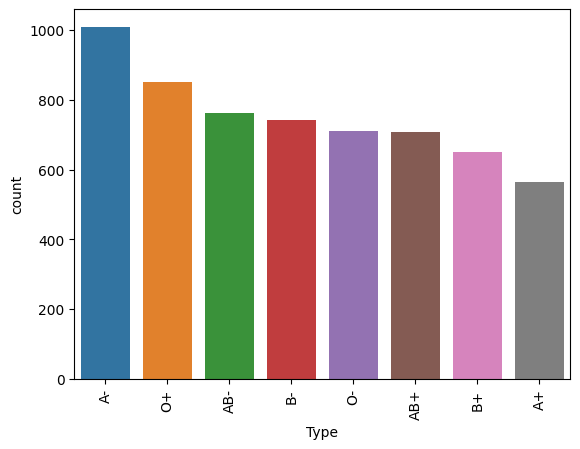

In [8]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [9]:
train, test = train_test_split(data, test_size=0.20, random_state=42)

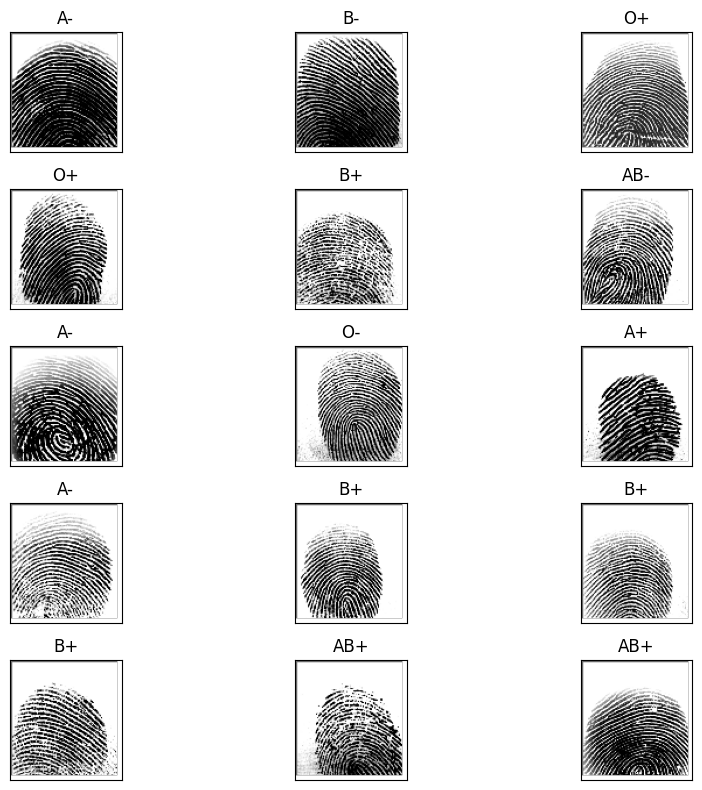

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [11]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
import cv2
import numpy as np

# File path of the image using a raw string
image_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/A-/cluster_1_0.BMP"
# Load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Define the transformation parameters
    angle = 30
    scale = 1.5
    center = (image.shape[1] // 2, image.shape[0] // 2)

    # Get the affine transformation matrix
    matrix = cv2.getRotationMatrix2D(center, angle, scale)

    # Print the affine matrix
    print("Affine Matrix:")
    print(matrix)


Affine Matrix:
[[  1.29903811   0.75       -52.60382907]
 [ -0.75         1.29903811  20.74905661]]


In [13]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 4800 validated image filenames belonging to 8 classes.
Found 1200 validated image filenames belonging to 8 classes.
Found 1200 validated image filenames belonging to 8 classes.


In [14]:
pretrained_model = ResNet50(
    input_shape=(256,256, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [15]:
# inputs = pretrained_model.input

# x = Dense(128, activation='relu')(pretrained_model.output)
# x = Dense(128, activation='relu')(x)
# print(inputs.shape)

# outputs = Dense(8, activation='softmax')(x)
# print(outputs.shape)

# model = Model(inputs=inputs, outputs=outputs)
# model.summary()

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

# Assuming `pretrained_model` is defined somewhere in your code

# Define the additional layers on top of the pretrained model
inputs = pretrained_model.input
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)
outputs = Dense(8, activation='softmax')(x)

# Create the final model
model = Model(inputs=inputs, outputs=outputs)

# Display the summary of the model architecture
# model.summary()

# # Access and print limited samples of the weights for each layer
# num_samples = 5  # Number of samples to display
# # for layer in model.layers:
# #     if hasattr(layer, 'weights'):
# #         print(layer.name)
# #         for weight in layer.weights:
#             print(weight.shape)
#             print(weight.numpy()[:num_samples])  # Prints a limited number of samples from the weight matrix


In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [19]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


Epoch 1/50
150/150 [==============================] - ETA: 0s - loss: 1.2374 - accuracy: 0.5231
Epoch 1: val_loss improved from inf to 0.95207, saving model to Blood_Final.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


150/150 [==============================] - 55s 325ms/step - loss: 1.2374 - accuracy: 0.5231 - val_loss: 0.9521 - val_accuracy: 0.6483
Epoch 2/50
150/150 [==============================] - ETA: 0s - loss: 0.7987 - accuracy: 0.6875
Epoch 2: val_loss improved from 0.95207 to 0.72190, saving model to Blood_Final.h5
150/150 [==============================] - 17s 116ms/step - loss: 0.7987 - accuracy: 0.6875 - val_loss: 0.7219 - val_accuracy: 0.7342
Epoch 3/50
150/150 [==============================] - ETA: 0s - loss: 0.6729 - accuracy: 0.7335
Epoch 3: val_loss improved from 0.72190 to 0.67758, saving model to Blood_Final.h5
150/150 [==============================] - 17s 111ms/step - loss: 0.6729 - accuracy: 0.7335 - val_loss: 0.6776 - val_accuracy: 0.7342
Epoch 4/50
150/150 [==============================] - ETA: 0s - loss: 0.5583 - accuracy: 0.7710
Epoch 4: val_loss improved from 0.67758 to 0.64420, saving model to Blood_Final.h5
150/150 [==============================] - 18s 117ms/step - l

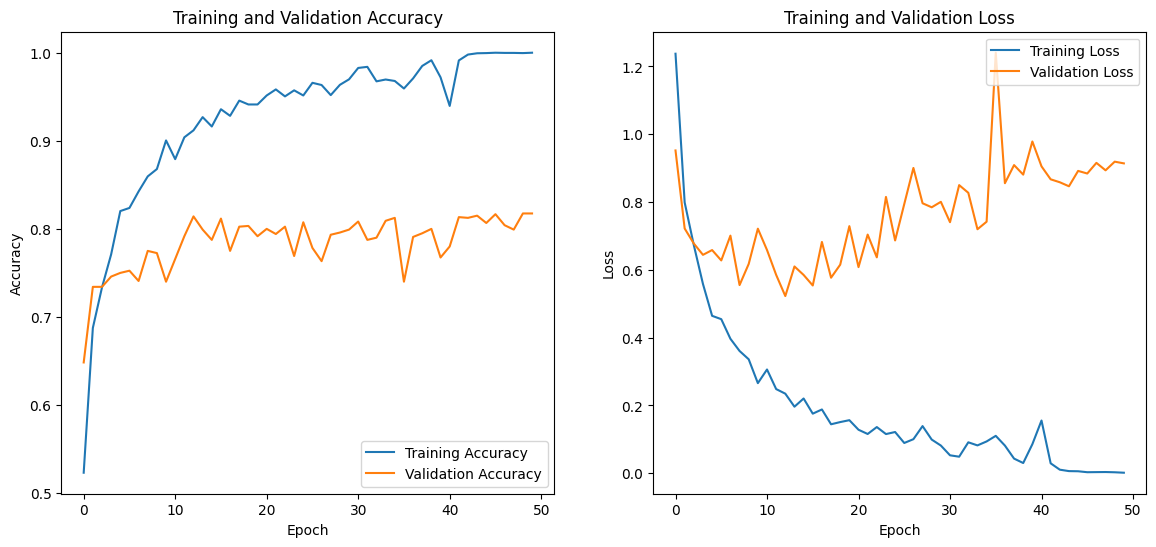

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

# 1. Configure the callback to save the ENTIRE model
checkpoint_filepath = 'Blood_Final.h5' # Your new filename
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # This saves the full model
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1  # This will print a message when the model improves
)

# 2. Train the model and get the history
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50,  # Set the total number of epochs here
    callbacks=[model_checkpoint_callback]
    # verbose=1 is the default and gives you the progress bar
)

print("\n✅ Training completed!")
print(f"✅ Best model saved to '{checkpoint_filepath}'")


# --- 3. PLOT THE TRAINING HISTORY ---
print("\n📈 Generating training plots...")

# Extract accuracy and loss from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Create a figure with two plots
plt.figure(figsize=(14, 6))

# Plot 1: Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot 2: Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Display the plots
plt.show()

In [23]:
from keras.models import load_model
model_path = '/kaggle/input/pk-project-modelfinal/New_final_save.h5'
model = load_model(model_path)
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.06508
Test Accuracy: 98.17%


38/38 [==============================] - 4s 89ms/step


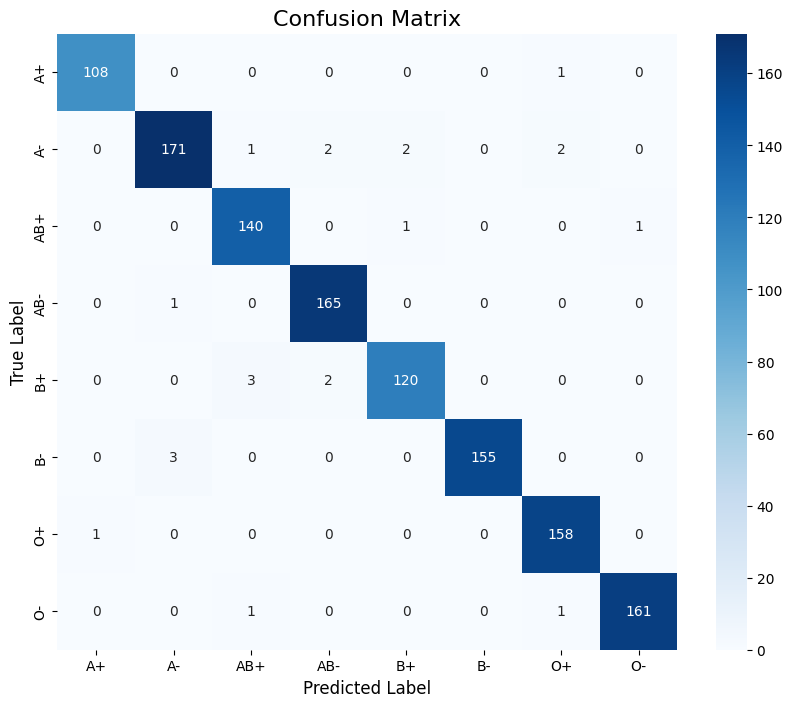

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# --- 1. Get the model's predictions ---
# The output of predict will be probabilities for each class
y_pred_probs = model.predict(test_gen)

# Convert the probabilities into actual class predictions (the one with the highest probability)
y_pred = np.argmax(y_pred_probs, axis=1)

# --- 2. Get the true labels from the generator ---
y_true = test_gen.classes

# --- 3. Calculate the confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

# --- 4. Plot the confusion matrix using a heatmap ---
# Get the class names from the generator
class_names = list(test_gen.class_indices.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

In [25]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)
print(pred)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

38/38 [==============================] - 4s 93ms/step
[4 6 6 ... 1 7 2]


In [26]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          A+       0.99      0.99      0.99       109
          A-       0.98      0.96      0.97       178
         AB+       0.97      0.99      0.98       142
         AB-       0.98      0.99      0.99       166
          B+       0.98      0.96      0.97       125
          B-       1.00      0.98      0.99       158
          O+       0.98      0.99      0.98       159
          O-       0.99      0.99      0.99       163

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



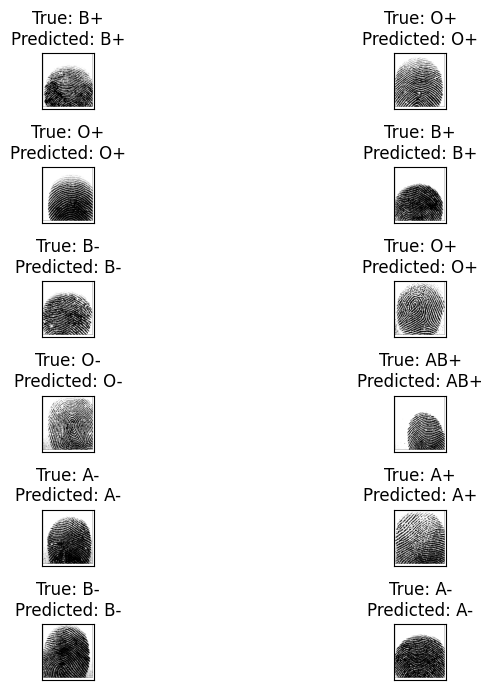

In [28]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# # --- This code goes AFTER your model.fit() call ---

# # Extract accuracy and loss from the history object
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(len(acc))

# # Create a figure with two subplots
# plt.figure(figsize=(14, 6))

# # Subplot 1: Training and Validation Accuracy
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

# # Subplot 2: Training and Validation Loss
# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

# # Show the plots
# plt.show()

In [29]:
# from sklearn.metrics import precision_score

# # Assuming you have test_labels_int and pred_int defined
# # Convert string labels in test.Label to integers
# label_to_int = {label: i for i, label in enumerate(set(test.Label))}
# test_labels_int = [label_to_int[label] for label in test.Label]

# # Calculate precision score for each class
# precision_per_class = precision_score(test_labels_int, pred_int, average=None)

# # Plot images with true and predicted labels along with precision percentage
# fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 7),
#                          subplot_kw={'xticks': [], 'yticks': []})

# for i, ax in enumerate(axes.flat):
#     ax.imshow(plt.imread(test.Filepath.iloc[i]))
#     true_label = test.Label.iloc[i]
#     predicted_label = label_to_int[pred[i]]  # Convert predicted label to integer index
#     precision_label = precision_per_class[predicted_label] * 100 if predicted_label < len(precision_per_class) else 0
#     ax.set_title(f"True: {true_label}\nPredicted: {pred[i]}\nAccuracy: {precision_label:.2f}%")

# plt.tight_layout()
# plt.show()


In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# # 1. Configure the callback to save the ENTIRE model
# checkpoint_filepath = 'New_final_save.h5' # Your new filename
# model_checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=False,  # This is the key change to save everything!
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True,
#     verbose=1  # This will print a message when the model is saved
# )

# # 2. Train the model in ONE go
# #    Keras will show a nice progress bar and use the callback automatically.
# history = model.fit(
#     train_gen,
#     validation_data=valid_gen,
#     epochs=50,  # Set the total number of epochs here
#     callbacks=[model_checkpoint_callback]
#     # verbose=1 is the default and gives you the progress bar
# )

# print("\n✅ Training completed!")
# print(f"✅ Best model saved to '{checkpoint_filepath}'")

In [ ]:
# from keras.models import load_model
# model_path = '/kaggle/input/blood-group-output/model_blood_group_detection.h5'
# model = load_model(model_path)
# results = model.evaluate(test_gen, verbose=0)

# print("    Test Loss: {:.5f}".format(results[0]))
# print("Test Accuracy: {:.2f}%".format(results[1] * 100))

In [30]:
# from sklearn.metrics import precision_score

# # Assuming you have test_labels_int and pred_int defined
# # Convert string labels in test.Label to integers
# label_to_int = {label: i for i, label in enumerate(set(test.Label))}
# test_labels_int = [label_to_int[label] for label in test.Label]

# # Calculate precision score for each class
# precision_per_class = precision_score(test_labels_int, pred_int, average=None)

# # Choose the index of the image you want to display
# image_index = 1199

# # Plot the single image with true and predicted labels along with precision percentage
# fig, ax = plt.subplots(figsize=(5, 5))

# ax.imshow(plt.imread(test.Filepath.iloc[image_index]))
# true_label = test.Label.iloc[image_index]
# predicted_label = label_to_int[pred[image_index]]  # Convert predicted label to integer index
# precision_label = precision_per_class[predicted_label] * 100 if predicted_label < len(precision_per_class) else 0
# ax.set_title(f"True: {true_label}\nPredicted: {pred[image_index]}\nAccuracy: {precision_label:.2f}%")

# plt.axis('off')
# plt.show()


In [ ]:
# from sklearn.metrics import precision_score

# # Assuming you have test_labels_int and pred_int defined
# # Convert string labels in test.Label to integers
# label_to_int = {label: i for i, label in enumerate(set(test.Label))}
# test_labels_int = [label_to_int[label] for label in test.Label]

# # Calculate precision score for each class
# precision_per_class = precision_score(test_labels_int, pred_int, average=None)

# # Plot images with true and predicted labels
# fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 7),
#                          subplot_kw={'xticks': [], 'yticks': []})

# for i, ax in enumerate(axes.flat):
#     ax.imshow(plt.imread(test.Filepath.iloc[i]))
#     ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")

# # Print precision percentage for each class
# for i, precision in enumerate(precision_per_class):
#     print(f"Precision for class {i}: {precision * 100:.2f}%")

# plt.tight_layout()
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_score

# # Assuming you have test_labels_int and pred_int already defined

# # Plot images with true and predicted labels
# fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 7),
#                          subplot_kw={'xticks': [], 'yticks': []})

# for i, ax in enumerate(axes.flat):
#     ax.imshow(plt.imread(test.Filepath.iloc[i]))
#     ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")

# plt.tight_layout()
# plt.show()

# # Calculate precision score for each class
# precision_per_class = precision_score(test_labels_int, pred_int, average=None)

# # Print precision percentage for each class
# for i, precision in enumerate(precision_per_class):
#     print(f"Precision for class {i}: {precision * 100:.2f}%")


In [ ]:
# from sklearn.metrics import precision_score

# # Calculate precision score for each class
# precision_per_class = precision_score(test_labels_int, pred_int, average=None)

# # Print precision percentage for each class
# for i, precision in enumerate(precision_per_class):
#     print(f"Precision for class {i}: {precision * 100:.2f}%")


In [ ]:
# from sklearn.metrics import precision_score

# # Convert string labels in test.Label to integers
# label_to_int = {label: i for i, label in enumerate(set(test.Label))}
# test_labels_int = [label_to_int[label] for label in test.Label]

# # Get precision score for each class
# precision_per_class =precision_score(test_labels_int, pred,average=None) * 100

# # Plot images with true and predicted labels
# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
#                          subplot_kw={'xticks': [], 'yticks': []})

# for i, ax in enumerate(axes.flat):
#     ax.imshow(plt.imread(test.Filepath.iloc[i]))
#     true_label = test.Label.iloc[i]
#     predicted_label = pred_int[i]
#     precision_label = precision_per_class[predicted_label] if predicted_label < len(precision_per_class) else 0
#     ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}\nPrecision: {precision_label:.2f}%")

# plt.tight_layout()
# plt.show()

# # Print precision percentage for each class
# for i, precision in enumerate(precision_per_class):
#     print(f"Precision for class {i}: {precision:.2f}%")


In [ ]:
# from sklearn.metrics import precision_score

# # Convert string labels in test.Label to integers
# label_to_int = {label: i for i, label in enumerate(set(test.Label))}
# test_labels_int = [label_to_int[label] for label in test.Label]

# # Get precision score for each class
# precision_per_class = precision_score(test_labels_int, pred_int, average=None) * 100

# # Plot images with true and predicted labels
# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
#                          subplot_kw={'xticks': [], 'yticks': []})

# for i, ax in enumerate(axes.flat):
#     ax.imshow(plt.imread(test.Filepath.iloc[i]))
#     true_label = test.Label.iloc[i]
#     predicted_label = pred_int[i]
#     precision_label = precision_per_class[predicted_label] if predicted_label < len(precision_per_class) else 0
#     ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}\nPrecision: {precision_label:.2f}%")

# plt.tight_layout()
# plt.show()

# # Print precision percentage for each class
# for i, precision in enumerate(precision_per_class):
#     print(f"Precision for class {i}: {precision:.2f}%")


**FOR SINGLE IMAGE EVALUATION**

In [ ]:
# from sklearn.metrics import precision_score
# import matplotlib.pyplot as plt
# #from sklearn.svm import SVC 

# # Assuming you have obtained predictions somehow, let's say in a list called 'pred_int'
# # Example:
# # pred_int = [0, 1, 0, 1, 0, ...]

# # Replace this example with your actual predictions

# # Let's assume you have your 'test' dataframe already defined and containing test data

# # Convert string labels in test.Label to integers
# label_to_int = {label: i for i, label in enumerate(set(test.Label))}
# test_labels_int = [label_to_int[label] for label in test.Label]

# # Assuming you have already defined 'pred_int' containing predicted labels

# # Get precision score for each class
# #classifier = SVC() 
# #pred_int = classifier.predict(test_gen)
# precision_per_class = precision_score(test_labels_int, pred_int, average=None) * 100

# # Plot images with true and predicted labels
# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
#                          subplot_kw={'xticks': [], 'yticks': []})

# for i, ax in enumerate(axes.flat):
#     ax.imshow(plt.imread(test.Filepath.iloc[i]))
#     true_label = test.Label.iloc[i]
#     predicted_label = pred_int[i]  # assuming 'pred_int' contains predicted labels
#     precision_label = precision_per_class[predicted_label] if predicted_label < len(precision_per_class) else 0
#     ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}\nPrecision: {precision_label:.2f}%")

# plt.tight_layout()
# plt.show()

# # Print precision percentage for each class
# for i, precision in enumerate(precision_per_class):
#     print(f"Precision for class {i}: {precision:.2f}%")


In [ ]:
# # Predict the label of the test_gen
# #train_gen=train_gen[:38]
# pred = model.predict(train_gen)
# pred = np.argmax(pred,axis=1)

# # Map the label
# labels = (train_gen.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# pred = [labels[k] for k in pred]

In [ ]:
# y_valid = list(train.Label)
# print(classification_report(y_valid, pred))

In [ ]:
# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
#                         subplot_kw={'xticks': [], 'yticks': []})

# for i, ax in enumerate(axes.flat):
#     ax.imshow(plt.imread(val.Filepath.iloc[i]))
#     ax.set_title(f"True: {val.Label.iloc[i]}\nPredicted: {pred[i]}")
# plt.tight_layout()
# plt.show()

In [ ]:
# from keras.preprocessing import image
# import numpy as np
# from keras.models import load_model

# # Load the pre-trained model
# model_path = '/kaggle/input/blood-500/model_blood_group_detection.h5'
# model = load_model(model_path)

# # Path to the single image you want to predict
# image_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_1141.BMP'

# # Load the image
# img = image.load_img(image_path, target_size=(256, 256))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0) / 255.

# # Make the prediction
# pred = model.predict(img_array)

# # Map the predicted class index to the label
# labels = dict((v,k) for k,v in train_gen.class_indices.items())
# predicted_class = labels[np.argmax(pred)]

# # Print the predicted class
# print(f"Predicted class: {predicted_class}")

In [ ]:
# import matplotlib.pyplot as plt

# # Assuming pred is a list of predicted labels

# # Choose an index for the image you want to display
# index = 0

# plt.imshow(plt.imread(test.Filepath.iloc[index]))
# plt.title(f"True: {test.Label.iloc[index]}\nPredicted: {pred[index]}")
# plt.axis('off')
# plt.show()


In [ ]:
# from keras.preprocessing import image
# import numpy as np

# # Load the image
# model_path = '/kaggle/input/blood-500/model_blood_group_detection.h5'
# model = load_model(model_path)
# img_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/O-/cluster_7_1002.BMP'
# target_size = (224, 224)  # Specify the target size as used in training/testing data preprocessing
# img = image.load_img(img_path, target_size=target_size)
# img = image.img_to_array(img)
# img = np.expand_dims(img, axis=0)  # Add batch dimension

# # Preprocess the image (same preprocessing applied during training/testing)
# # Add your preprocessing steps here (e.g., normalization, rescaling, etc.)

# # Make prediction
# prediction = model.predict(img)
# predicted_class = np.argmax(prediction)

# # Map the predicted class
# labels = train_gen.class_indices
# labels = dict((v, k) for k, v in labels.items())
# predicted_label = labels[predicted_class]

# print("Predicted Blood Group:", predicted_label)
# plt.show()

In [ ]:
# from keras.preprocessing import image
# import numpy as np

# # Load the model
# model_path = '/kaggle/input/blood-500/model_blood_group_detection.h5'
# model = load_model(model_path)

# # Path to the single image you want to predict
# image_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/A-/cluster_1_0.BMP'

# # Load and preprocess the image
# img = image.load_img(image_path, target_size=(256, 256))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size

# # Predict the image
# predictions = model.predict(img_array)
# predicted_class = np.argmax(predictions)

# # Map the predicted class to label
# labels = (train_gen.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# pred = [labels[k] for k in pred]

# # Print the predicted label
# print("Predicted blood group:", pred)


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import load_model

# # Load the trained model
# model_path = '/kaggle/input/blood-500/model_blood_group_detection.h5'
# model = load_model(model_path)

# # Path to the single image you want to predict
# image_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_100.BMP'

# # Load and preprocess the image
# img = image.load_img(image_path, target_size=(256,256))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array = img_array / 255.0  # Normalize the image data if needed

# # Make prediction
# prediction = model.predict(img_array)
# predicted_class = np.argmax(prediction)

# # Show the image and prediction
# fig, ax = plt.subplots(figsize=(6, 4))
# ax.imshow(img)
# ax.set_title(f"Predicted: {class_labels[predicted_class]}")
# ax.axis('off')
# plt.show()


In [ ]:
# from keras.models import load_model
# from keras.preprocessing import image
# import numpy as np
# import matplotlib.pyplot as plt

# # Provide the file path of the image you want to evaluate
# image_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_100.BMP'  # Replace with the actual file path

# # Load the trained model
# model_path = '/kaggle/input/blood-500/model_blood_group_detection.h5'
# model = load_model(model_path)

# # Load and preprocess the image
# img = image.load_img(image_path, target_size=(256, 256))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0  # Normalize the pixel values to be between 0 and 1, similar to your training data

# # Make predictions
# predictions = model.predict(img_array)

# # Get the predicted class index
# predicted_class_index = np.argmax(predictions[0])

# # Map the class index to the corresponding label
# # Assuming you have a dictionary 'train_gen.class_indices' mapping class indices to labels
# labels = train_gen.class_indices
# labels = dict((v, k) for k, v in labels.items())
# predicted_label = labels[predicted_class_index]

# # Display the original image along with the predicted label
# plt.imshow(img)
# plt.title(f"Predicted: {predicted_label}")
# plt.show()
